# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64
           Make    Make_Year  Color  Body_Type   Mileage_Run  No_of_Owners  \
count       976   976.000000    976        976    976.000000    976.000000   
unique       16          NaN     15          5           NaN           NaN   
top     Hyundai          NaN  white  hatchback           NaN           NaN   
freq        305          NaN    200        484           NaN           NaN   
mean        NaN  2016.963115    NaN        NaN  41571.195697      1.165984   
std         NaN     2.818742    NaN        NaN  24390.995134      0.383119   
min         NaN  2011.000000    NaN        NaN   1117.000000      1.000000   
25%         NaN  2015.000000    NaN        NaN  22676.750000      1.000000   
50%         NaN  2017.000000    

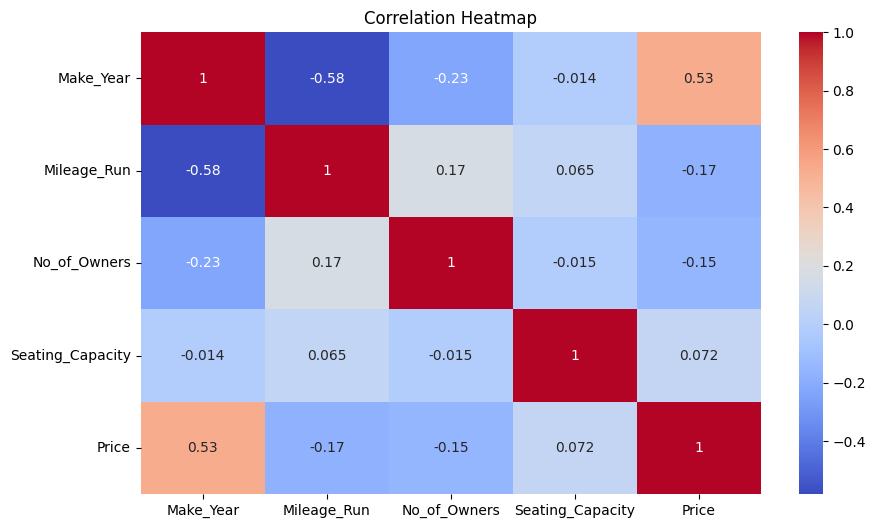

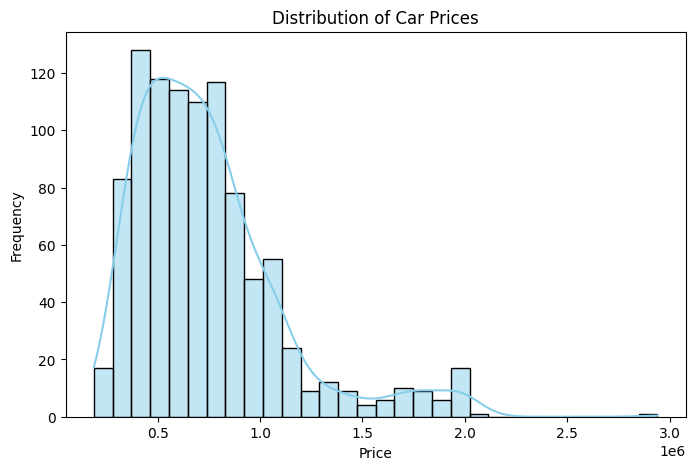

<ipython-input-6-e42bae29e5b8>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_make.values, y=avg_price_by_make.index, palette='viridis')


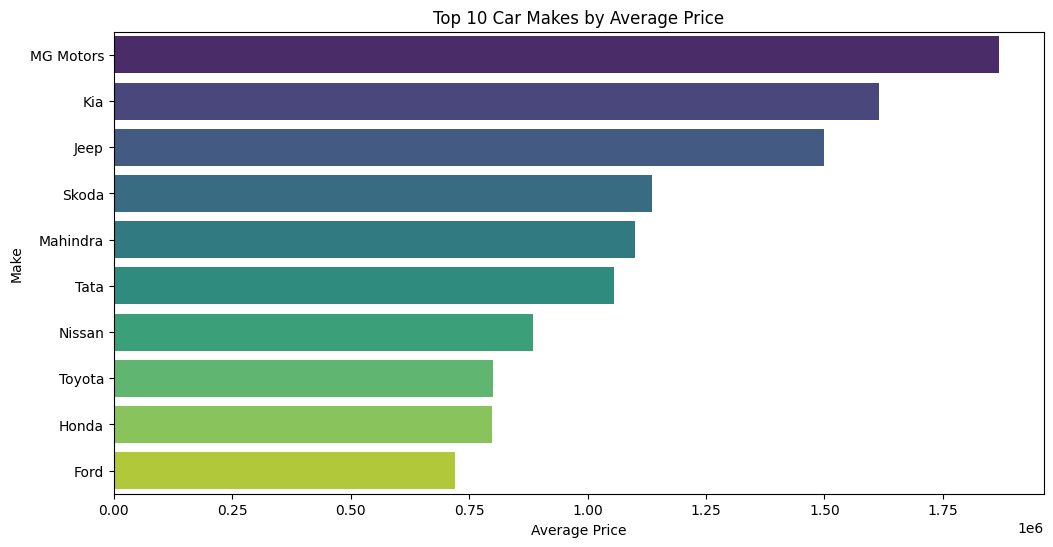

<ipython-input-6-e42bae29e5b8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='Set2')


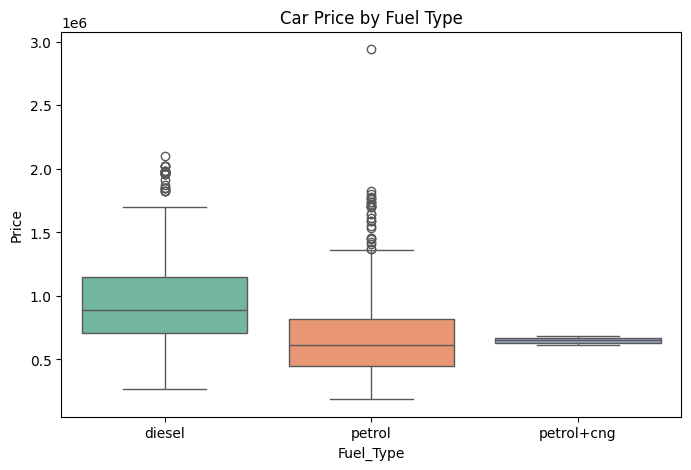

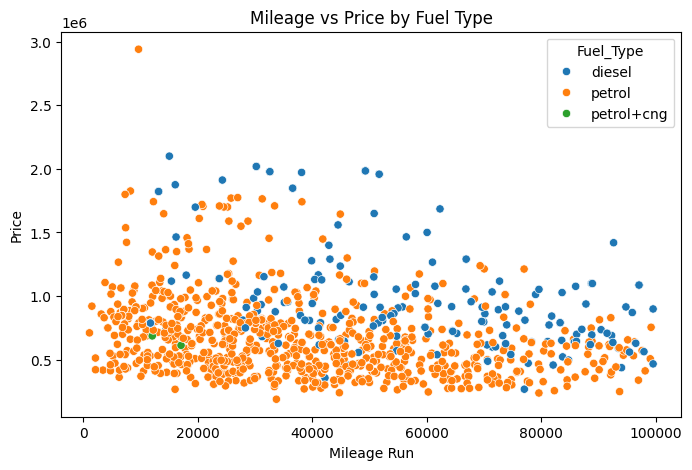

In [6]:
#question 1
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/ds4e/linearModels/refs/heads/main/lab/data/cars_hw.csv"
df = pd.read_csv(url,low_memory=False)

# Drop unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Convert 'No_of_Owners' to numeric
df['No_of_Owners'] = df['No_of_Owners'].str.extract('(\d)').astype(int)

# Check for missing values
missing_values = df.isnull().sum()

# Basic stats
summary_stats = df.describe(include='all')

print(missing_values)
print(summary_stats)

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of car prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Top 10 car makes by average price
plt.figure(figsize=(12, 6))
avg_price_by_make = df.groupby('Make')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_by_make.values, y=avg_price_by_make.index, palette='viridis')
plt.title("Top 10 Car Makes by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Make")
plt.show()

# Boxplot of price by fuel type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='Set2')
plt.title("Car Price by Fuel Type")
plt.show()

# Scatter plot of Mileage vs Price colored by Fuel Type
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mileage_Run', y='Price', hue='Fuel_Type', data=df)
plt.title("Mileage vs Price by Fuel Type")
plt.xlabel("Mileage Run")
plt.ylabel("Price")
plt.show()



In [7]:
#question 2
# One-hot encode categorical variables
df_transformed = pd.get_dummies(df, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type'], drop_first=True)

# Confirm transformation
df_transformed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Make_Year                 976 non-null    int64
 1   Mileage_Run               976 non-null    int64
 2   No_of_Owners              976 non-null    int64
 3   Seating_Capacity          976 non-null    int64
 4   Price                     976 non-null    int64
 5   Make_Datsun               976 non-null    bool 
 6   Make_Ford                 976 non-null    bool 
 7   Make_Honda                976 non-null    bool 
 8   Make_Hyundai              976 non-null    bool 
 9   Make_Jeep                 976 non-null    bool 
 10  Make_Kia                  976 non-null    bool 
 11  Make_MG Motors            976 non-null    bool 
 12  Make_Mahindra             976 non-null    bool 
 13  Make_Maruti Suzuki        976 non-null    bool 
 14  Make_Nissan               976 non-null    

In [8]:
#question3
from sklearn.model_selection import train_test_split

# Define X and y
X = df_transformed.drop(columns=['Price'])
y = df_transformed['Price']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
#question 4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a list of basic models with only one predictor each (no transformations or interactions)
simple_features = ['Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity']

results = {}

for feature in simple_features:
    X_single_train = X_train[[feature]]
    X_single_test = X_test[[feature]]

    model = LinearRegression()
    model.fit(X_single_train, y_train)

    y_train_pred = model.predict(X_single_train)
    y_test_pred = model.predict(X_single_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[feature] = {
        "Train RMSE": train_rmse,
        "Train R²": train_r2,
        "Test RMSE": test_rmse,
        "Test R²": test_r2
    }

# Find the best model based on test RMSE
best_feature = min(results, key=lambda x: results[x]['Test RMSE'])
best_model_metrics = results[best_feature]

print("Best simple model feature:", best_feature)
print("Metrics:", best_model_metrics)

#The "best" model is the one with the lowest RMSE on the test set.
#Make_Year is the best single predictor for car price among the simple models, as it leads to the lowest test RMSE and a relatively high R².

Best simple model feature: Make_Year
Metrics: {'Train RMSE': np.float64(317443.7103813633), 'Train R²': 0.27804786992730657, 'Test RMSE': np.float64(288232.56357944733), 'Test R²': 0.2756644914438058}


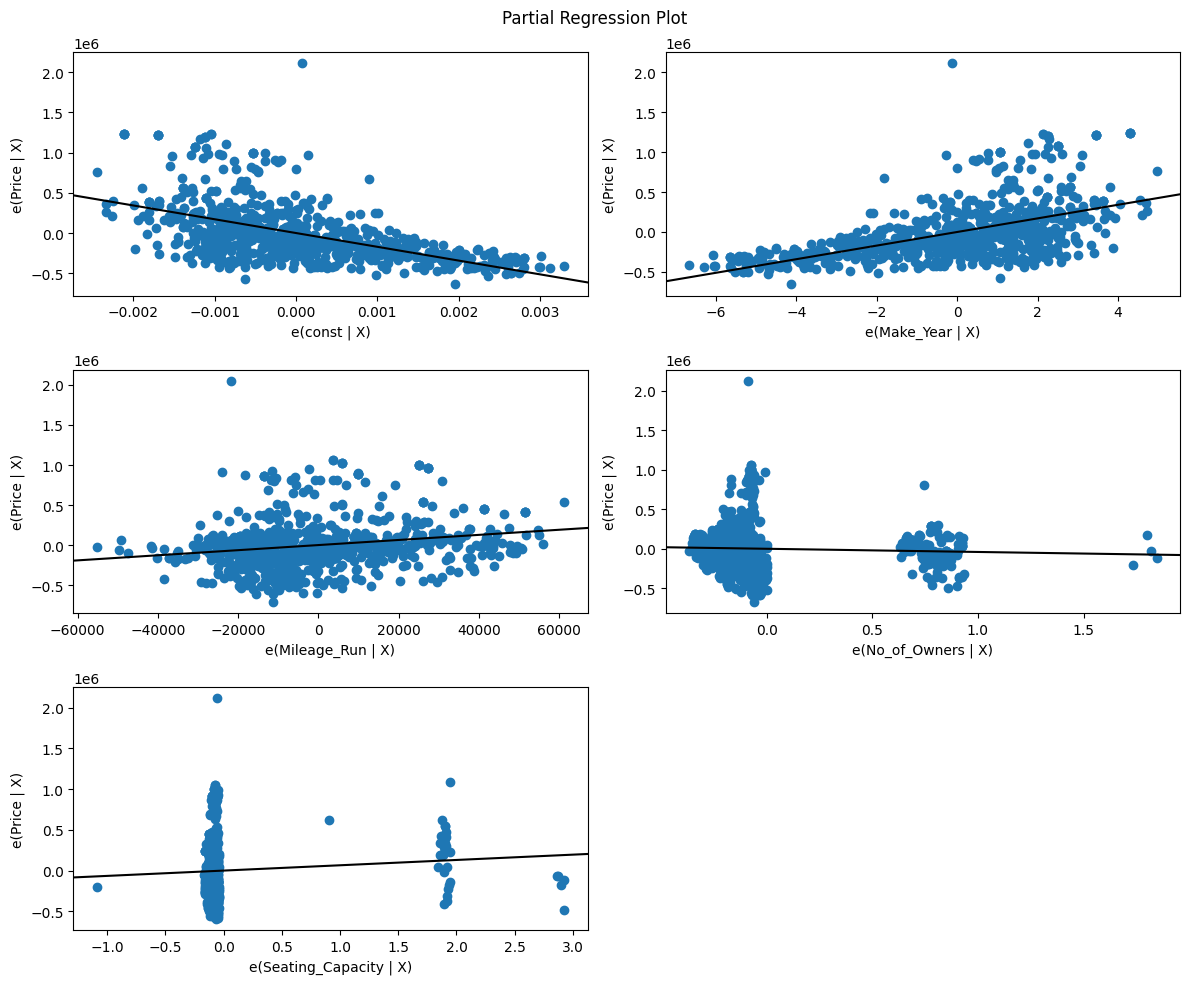

In [11]:
# question 5
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.api as sm

# Select numeric predictors
numeric_features = ['Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity']
X_numeric = X_train[numeric_features]
X_numeric = sm.add_constant(X_numeric)  # add intercept for statsmodels

# Fit OLS model for partial regression plots
ols_model = sm.OLS(y_train, X_numeric).fit()

# Plot partial regression (partial correlation) plots
fig = plt.figure(figsize=(12, 10))
plot_partregress_grid(ols_model, fig=fig)
plt.tight_layout()
plt.show()

# There are no significant non-linearlity as none of the graphs show a curve or diminishing effect.


In [12]:
#question 6

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select key numeric features
key_features = ['Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity']

# Generate polynomial and interaction terms (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train[key_features])
X_poly_test = poly.transform(X_test[key_features])

# Fit linear regression on transformed features
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

# Predict
y_train_pred_poly = model_poly.predict(X_poly)
y_test_pred_poly = model_poly.predict(X_poly_test)

# Metrics
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
train_r2_poly = r2_score(y_train, y_train_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)

# Output
print("Complex Model - Train RMSE:", train_rmse_poly)
print("Complex Model - Train R²:", train_r2_poly)
print("Complex Model - Test RMSE:", test_rmse_poly)
print("Complex Model - Test R²:", test_r2_poly)


Complex Model - Train RMSE: 300372.24825028545
Complex Model - Train R²: 0.35361010403972426
Complex Model - Test RMSE: 277107.6360619522
Complex Model - Test R²: 0.33049985724868725


The complex model performs better than the simpler ones by capturing non-linear relationships and interactions between variables, leading to improved RMSE and R² on the test set. This suggests it better reflects how features like mileage and make year jointly influence car prices. However, if the test R² is much lower than the training R², it may indicate overfitting despite the improved accuracy.

Question 7: Through this process, I learned that simple models can underfit by failing to capture important relationships, while complex models can overfit if they are too tailored to the training data. The key is to find a balance through cross-validation, transformations, and careful feature engineering. Visual tools like partial regression plots are helpful for diagnosing non-linearities, and evaluation metrics like RMSE and R² are essential for guiding model selection.

In [13]:
# question 8
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use all transformed features (categorical + numeric)
X = df_transformed.drop(columns=['Price'])
y = df_transformed['Price']

# Split again (if not already done)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso with cross-validation
lasso_pipeline = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))
lasso_pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print("Lasso Selected Alpha:", lasso_pipeline.named_steps['lassocv'].alpha_)
print("Lasso Train RMSE:", train_rmse)
print("Lasso Train R²:", train_r2)
print("Lasso Test RMSE:", test_rmse)
print("Lasso Test R²:", test_r2)


Lasso Selected Alpha: 6207.873477775634
Lasso Train RMSE: 147982.01746218512
Lasso Train R²: 0.8431108766121816
Lasso Test RMSE: 150292.05342776095
Lasso Test R²: 0.8030637230483919
